Exercise 1


### C ###
DeltaX function for 0 to 9 with step 0.1
[[-0.1  0.   0.1]
 [ 0.9  1.   1.1]
 [ 1.9  2.   2.1]
 [ 2.9  3.   3.1]
 [ 3.9  4.   4.1]
 [ 4.9  5.   5.1]
 [ 5.9  6.   6.1]
 [ 6.9  7.   7.1]
 [ 7.9  8.   8.1]
 [ 8.9  9.   9.1]]
### H ###


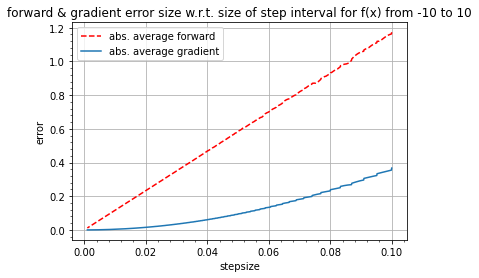

### I ###
for forward differentiation:
The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 37.8 µs per loop

for gradient differentiation:
The slowest run took 7.21 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 57.4 µs per loop
### J ###


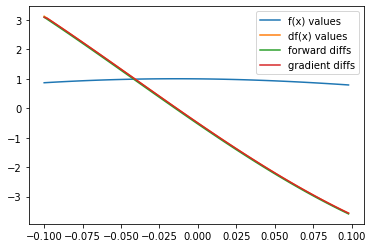

In [ ]:
import numpy as np
import math

### A ### - defining f(x) for both individual floats and lists
def f(x):
  x = np.array(x)
  return np.e**(-x/2) * np.cos(6*x)

### B ###
# defining manual derivative
def df(x):
  x = np.array(x)
  return -(1/2) * np.e**(-x/2) * (12*np.sin(6*x)+np.cos(6*x))

print("### C ###")
### C ###
#defining stepsize
#numpy array with each row consisting of [x-dx, x, x+dx]
def deltaX(list,dx):
  output = np.empty((0,3))
  for x in list:
    newrow = np.array([x-dx,x,x+dx])
    output = np.vstack((output,newrow))
  return output
print("DeltaX function for 0 to 9 with step 0.1")
print(deltaX(np.arange(0,10,1), 0.1))

### D ###
# finds the forward difference in f(x), and divides it by the step size (forward difference in x)
def forward_diff(xvalues):
  yvalues = np.array(f(xvalues))
  differential = np.diff(yvalues)/np.diff(xvalues)
  return differential

### E ###
# finds the gradient difference in f(x), and divides it by the step size (forward difference in x)
# the np.gradient has an extra value, and we remove its last value because we consider the np.diff change to correspond to the initial value.
def gradient_diff(xvalues):
  yvalues =  np.array(f(xvalues))
  differential =  np.gradient(yvalues)[:-1]/np.diff(xvalues)
  return differential

### F ###
#calculates errors by subtracting the true value, df(x), from the forward error and gradient error respectively.
#as we reduced the range by 1 (from the initial len(xvalues)), we take away the last value of df(x) too
def f_errors(xvalues):
  error_forward = abs(forward_diff(xvalues) - df(xvalues)[:-1])
  error_gradient = abs(gradient_diff(xvalues) - df(xvalues)[:-1])
  return error_forward, error_gradient

### G ###
#i was having problems & confusions using the deltax graph earlier and making it work with the gradient_diff, so i ended up forgetting about the deltax graph
#to find the error, I use the forward_diff and gradient_diff functions on a range of x's where i consider the difference between them the steps
#i.e. from -3 to 3, i take forward_diff([-3,-2.9,-2.8 ... 2.8, 2.9. 3])
#i make this point, because I wasn't sure if instead i was supposed to take integer x's and evaluate forward_diff between them and their delta x's, calling delta x the step
#i.e. from -3 to 3, it takes forward_diff([-3.1, -3, -2.9]), forward_diff([-2.1, -2.0, -1.9]), ... forward_diff([1.9,2.0,2.1]), forward_diff([2.9,3.0,3.1])

#here we loop through every step in the described linspace, finding the absolute average and appending them to a list
#for the xvalues, we take a range from -10 to 10 in steps equal to the looping stepsize
stepsizes = np.linspace(0.1,0.001,1000)
absolute_average_forward, absolute_average_gradient = [], []
for step in stepsizes:
  ef, eg= f_errors(np.arange(-1,1,step))                #Finds forward & gradient errors for xvalues between -10 and 10, with intervals equal to the step
  absolute_average_forward.append(sum(ef)/len(ef))        #Finds average of absolute forward error & adds it to the list
  absolute_average_gradient.append(sum(eg)/len(eg))       #Finds average of absolute gradient error & adds it to the list

print("### H ###")
### H ###
import matplotlib.pyplot as plt
fig1, data1 = plt.subplots()  #creating figure & axis
data1.plot(stepsizes, absolute_average_forward, 'r--', label='abs. average forward')  # plotting forward abs. average versus stepsizes
data1.plot(stepsizes, absolute_average_gradient, label='abs. average gradient')  # plotting gradient abs. average versus stepsizes
data1.set_xlabel('stepsize')  # labeling x axis
data1.set_ylabel('error')  # labeling y axis
data1.set_title("forward & gradient error size w.r.t. size of step interval for f(x) from -10 to 10")  # adding title
data1.legend()  # adding legend
data1.grid()   #adding grid

#setting up major/minor ticks
from matplotlib.ticker import (MultipleLocator)
data1.xaxis.set_minor_locator(MultipleLocator(0.004))  #x-axis minor ticks, in multiples of 0.004
data1.xaxis.set_major_locator(MultipleLocator(0.02))   #x-axis major ticks, in multiples of 0.02
data1.yaxis.set_minor_locator(MultipleLocator(0.04))    #y-axis minor ticks, in multiples of 0.5
data1.yaxis.set_major_locator(MultipleLocator(0.2))    #y-axis major ticks, in multiples of 2.5

plt.show()

print("### I ###")
### I ###
xs = np.arange(-10,10,0.1)
print("for forward differentiation:")
%timeit forward_diff(xs)
print()
print("for gradient differentiation:")
%timeit gradient_diff(xs)

#forward had both the fastest and slowest runs with a four-fold difference, making it seem a bit less reliable
#gradient has a consistent, albeit seemingly slower runtime
#looking at the errors, even though its slightly slower the gradient method seems to have much smaller errors than the forward method


print("### J ###")
### J ###
#Plotting x versus f(x), df(x), forwarddiff & gradientdiff to examine area around x=0.1
fig2, data2 = plt.subplots()
xvals = np.linspace(-0.1,0.1,100)
fxvalues = f(xvals)[:-1]
dfxvalues = df(xvals)[:-1]
forwarddiffvalues = forward_diff(xvals)
gradientdiffvalues = gradient_diff(xvals)
xvalues = xvals[:-1]

data2.plot(xvalues, fxvalues, label='f(x) values')
data2.plot(xvalues, dfxvalues, label='df(x) values')
data2.plot(xvalues, forwarddiffvalues, label ='forward diffs')
data2.plot(xvalues, gradientdiffvalues, label = 'gradient diffs')
plt.legend()
plt.show()
#Graph shows nothing, so I think the question asks for when delta x < 0.1
#Looking at the graph from H, when delta x < 0.1, the errors still seem manageable
#the forward error scales linearly, and can be too large with even relatively small step sizes
#When x > 0.1, the error of gradient becomes too large (error of 0.4 for values of 10^(-3)) to make the data precise

Exercise 3


In [ ]:
import plotly.graph_objects as pg
import pandas as pd
import numpy as np

z = np.linspace(0,25, 251)
x = [i*np.cos(i) for i in z]
y = [i*np.sin(i) for i in z]

#I first made the 3d graph using matplotlib, but wasnt able to make it interactive which is why I switched to plotly
fig = pg.Figure(data=pg.Scatter3d(x=x, y=y, z=z, marker=dict(size=4, color=z,), line=dict(color='darkblue',width=2)))
fig.update_layout(width=1000, height=800, autosize=True)

#Adding labels and arrows for electron entering and leaving the detector
fig.update_layout(
    scene=dict(
        xaxis_title='X Position of electron',
        yaxis_title='Y Position of electron',
        zaxis_title='Z Position of electron, constant with time', 
        xaxis=dict(),
        yaxis=dict(),
        zaxis=dict(),
        annotations=[
        dict(
            x=x[0],
            y=y[0],
            z=z[0],
            ax=500,
            ay=0,
            font=dict(
                color="red",
                size=12
            ),
            text="Electron enters detector",
            arrowhead=1,
            arrowcolor="red", 
            xanchor="left",
            yanchor="bottom"), 
        dict(
            x=x[250],
            y=y[250],
            z=z[250],
            ax=50,
            ay=0,
            font=dict(
                color="blue",
                size=12
            ),
            text="Electron exits detector",
            arrowhead=1,
            arrowcolor="blue", 
            xanchor="left",
            yanchor="bottom"
        )]
    ),
)
#Searched extensively, but couldnt find how to add a general title nor legend. title wouldve been "Electron path through magnetic field"


Exercise 4

What is your a?6
What is your b?8
What is your c?9
No real solutions, Complex solutions of z1 = (-0.6666666666666666+1.0274023338281626j) and z2 = (-0.6666666666666666-1.0274023338281626j)


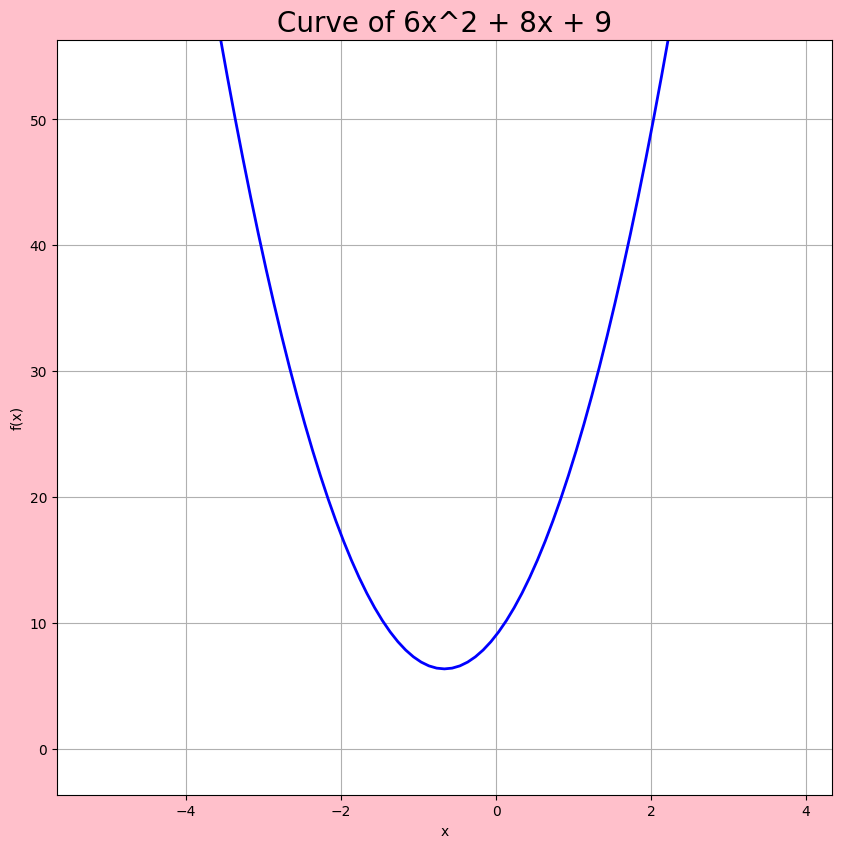

In [ ]:
import numpy as np 
from numpy import sin, cos
import matplotlib.pyplot as plt

a = int(input("What is your a?"))
b = int(input("What is your b?"))
c = int(input("What is your c?"))
# defining f(a,b,c), which finds roots of ax^2 + bx + c and plots them
def f(a, b, c):
  D = (b)**2 - 4*a*c                             # defines the descriminant = b^2-4ac
  M = -b/(2*a)                                   # defines x-midpoint of parabola
  H = a*(M**2) + b*(M) + c                       # defines y-value corresponding to above x-midpoint
  xvalues = np.linspace(M - 50,M + 50 , 1001)    # making a large array of Xvalues by using linspace centered around the middle of the parabola
  yvalues = [a*x**2 + b*x + c for x in xvalues]  # yvalues for plotting the parabola
  root1 = ((-1*b) + D**(1/2))/(2*a)              # finding x1
  root2 = ((-1*b) - D**(1/2))/(2*a)              # finding x2
  plt.figure(figsize=(10, 10), dpi=100)                                   # plotting figure and defining size & resolution
  plt.plot(xvalues, yvalues, 'blue', linewidth=2)                         # plotting x's versus y's and making the line blue
  plt.xlabel('x')                                                         # labelling the x-axis
  plt.ylabel('f(x)')                                                      # labelling the y-axis
  plt.title(f'Curve of {a}x^2 + {b}x + {c}', fontsize= 20, color= 'black')# adding a title
  plt.xlim(M - 5, M + 5)                                                  # domain centered around x-midpoint
  if a > 0:                                                               # range based around y-value of x-midpoint
    plt.ylim(H-10, H+50)                                                  # setting y limits corresponding to upwards and downwards curving parabolas                        
  elif a < 0:                                                       
    plt.ylim(H-50,H+10)
  plt.grid()                                                              # implements grid
  # using if statements to seperate the three different scenarios:
  if D < 0:                                                               # two complex solutions when the discriminant is less than zero
    print(f"No real solutions, Complex solutions of z1 = {root1} and z2 = {root2}")
  
  if D == 0:                                                              # single solution when discriminant is 0
    print(f"there is one solution of x = {root1}")
    plt.plot([root1], [0], 'ro')                                          # makes root a red dot

  if D > 0:                                                               # two real solutions when discriminant is greater than 0
    print(f"There are two solutions; x1 = {root1} and x2 = {root2}")
    plt.plot([root1], [0], 'ro')                                          # makes roots red dots
    plt.plot([root2], [0], 'ro')
  plt.show()
f(a,b,c)